# **Task 6 : Prediction using Decision Tree Algorithm**

**Title :** *To create a Decision Tree classifier and visualize it graphically*

**Author :** Mushfiqur Rahman 

# **Importing libraries**

In [1]:
import numpy as np 
import pandas as pd
import sklearn.datasets as datasets

# **Loading Dataset**

In [2]:
iris = datasets.load_iris() #Load the iris dataset
X = pd.DataFrame(iris.data, columns = iris.feature_names)
X.head() #See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# **Analyzing data**

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
target_df = pd.DataFrame(Y, columns=['Target'])
target_df.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [6]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [7]:
X.shape

(150, 4)

In [8]:
Y.shape

(150,)

In [9]:
target_df.shape

(150, 1)

In [10]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# **Splitting dataset into train and test sets**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state= 42)   #taking 35% data for test set and 65% for training set

# **Building Decision Tree Classifier**

In [13]:
from sklearn.tree import DecisionTreeClassifier
myTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
myTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
y_predict = myTree.predict(X_test)

# **Confusion Matrix**

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[19,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 16]])

In [16]:
#!pip install scikit-plot

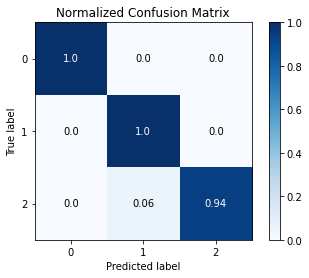

In [17]:
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, y_predict, normalize=True)  #normalising confusion matrix

In [18]:
print (y_predict [0:5])
print (y_test [0:5])

[1 0 2 1 1]
[1 0 2 1 1]


In [19]:
from sklearn import tree
import matplotlib.pyplot as plt

## **Visualization**

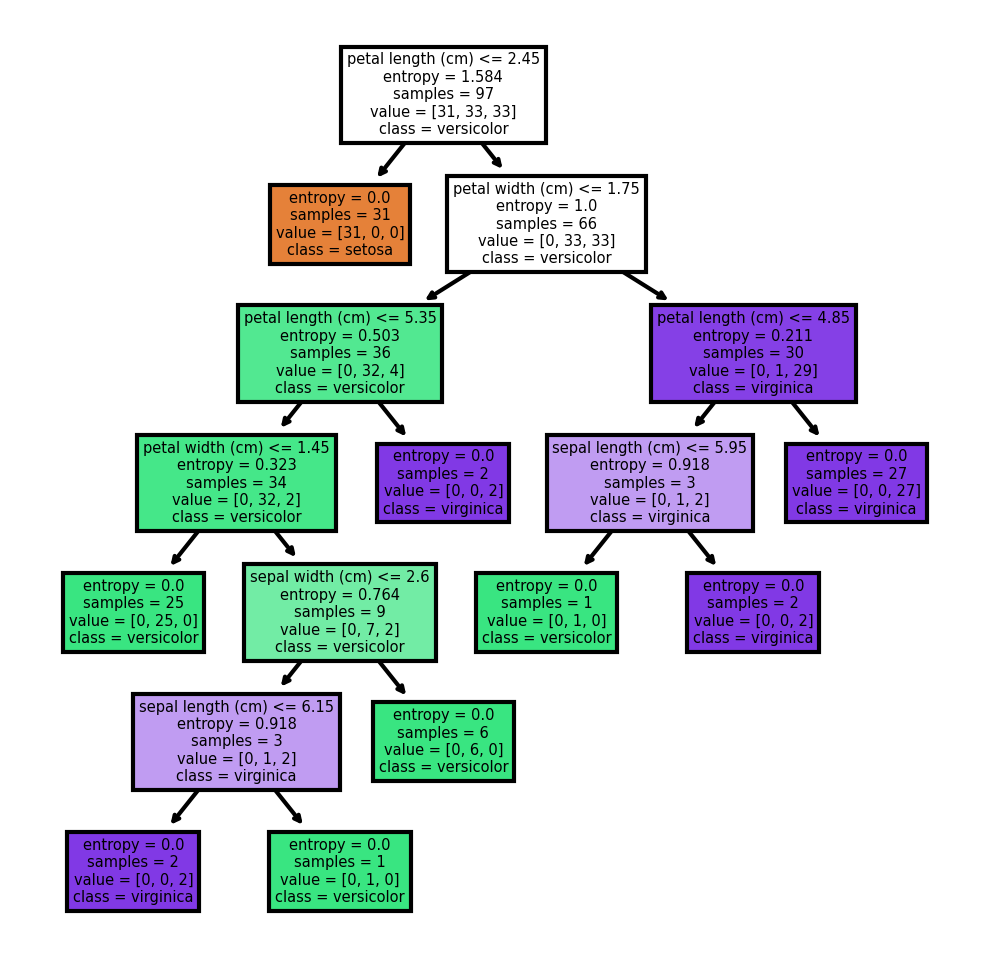

In [20]:

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(myTree, feature_names = fn, class_names = cn, filled = True);

# **Accuracy**

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.9811320754716981


Our decision tree has achieved approximately 98.11% accuracy which is of course a pretty good result. This model will be able to classify most of the values correctly.